In [1]:
import sys
import shutil
sys.path.append("../")

import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import *
from plot_skylocs import LimitPlot
from astropy.cosmology import Planck15
import corner

%matplotlib inline
%load_ext autoreload
%autoreload 2

catalog = pd.read_csv("/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv")

/tigress/smsharma/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Get object properties

In [2]:
print list(catalog)

['Unnamed: 0', 'Name', 'mulog10J_inf', 'siglog10J_inf', 'mulog10Jnb_inf', 'siglog10Jnb_inf', 'mulog10JB_inf', 'siglog10JB_inf', 'mulog10JBnb_inf', 'siglog10JBnb_inf', 'mulog10D_inf', 'siglog10D_inf', 'log10Mvir_inf', 'z', 'Nest', 'Ng', 'l', 'b', 'cvir_inf', 'rvir_inf', 'rs', 'ID_2MASXJ', 'Bib_z', 'GName', '3FGL 0.5', '3FGL 1', '3FGL 2', '3FGL 5', '3FGL 10', 'N3FGL 5', 'ang_ext', 'theta_vir', 'log10M200_inf', 'ra', 'dec', 'dA']


In [9]:
print catalog['Name'][15]
print catalog['mulog10J_inf'][15]
print catalog['dA'][15]
print catalog['theta_vir'][15]

print catalog['Name'][663]
print catalog['mulog10J_inf'][663]
print catalog['dA'][663]
print catalog['theta_vir'][663]

NGC3627
18.1133020883
9.69000159197
3.42267530132
IC4721
16.7531054286
20.7899934809
0.889591114549


# Flux Map

In [10]:
LL = np.load('../data/Tully/LL_inten_o15_data.npz')['LL']
inten = np.load('../data/Tully/LL_inten_o15_data.npz')['intens']

In [11]:
print np.shape(LL),np.shape(inten)

(40, 200) (40, 200)


In [13]:
max_inten = np.zeros(40)
for i in range(40):
    iLL = LL[i]
    loc = np.where(iLL == np.max(iLL))[0]
    max_inten[i] = inten[i][loc]

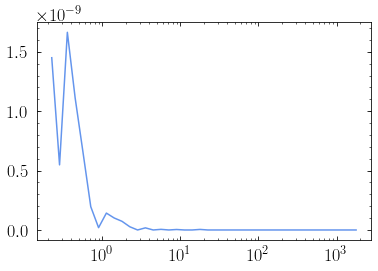

In [28]:
ebins = 2*10**(np.linspace(-1,3,41)+0.05)[0:40]
plt.plot(ebins,max_inten)
plt.xscale('log')
plt.show()

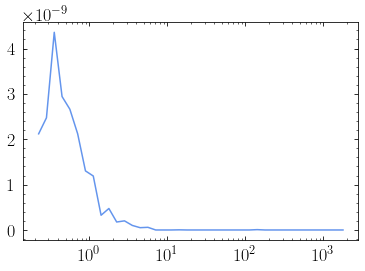

In [29]:
LL = np.load('../data/Tully/LL_inten_o663_data.npz')['LL']
inten = np.load('../data/Tully/LL_inten_o663_data.npz')['intens']

max_inten = np.zeros(40)
for i in range(40):
    iLL = LL[i]
    loc = np.where(iLL == np.max(iLL))[0]
    max_inten[i] = inten[i][loc]
    
ebins = 2*10**(np.linspace(-1,3,41)+0.05)[0:40]
plt.plot(ebins,max_inten)
plt.xscale('log')
plt.show()

# Sky map

In [33]:
# Get location

l, b = catalog['l'].values[15], catalog['b'].values[15]
print l, b

phi = l*np.pi/180.
theta = np.pi/2 - b*np.pi/180.

print phi, theta

lonval = ((l + 180.) % 360.) - 180.

241.4621 64.3631
4.21430866378 0.447448315005


In [4]:
# Load fermi plugin and data
from local_dirs import *
sys.path.append(nptf_old_dir)
import fermi.fermi_plugin as fp

maps_dir='/tigress/smsharma/public/CTBCORE/'
fermi_data_dir='/tigress/smsharma/public/FermiData/'
work_dir = '/tigress/nrodd/DM-Catalog-Scan/'
f_global = fp.fermi_plugin(maps_dir, fermi_data_dir=fermi_data_dir, work_dir=work_dir, 
                           CTB_en_min=0, CTB_en_max=40, nside=128, eventclass=5, 
                           eventtype=0, newstyle=1, data_July16=True)

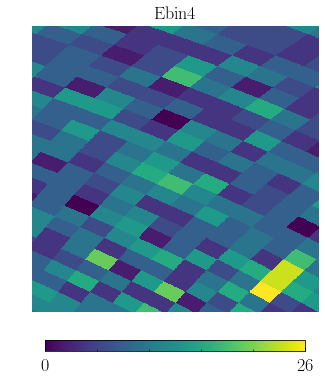

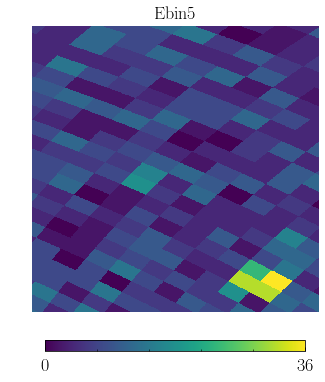

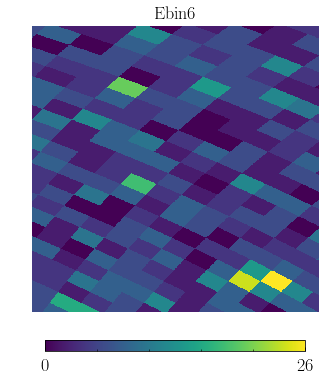

In [35]:
for ebin in range(4,7):
    data = f_global.CTB_count_maps[ebin]
    hp.cartview(data,lonra=[lonval-5,lonval+5],latra=[b-5,b+5],title='Ebin'+str(ebin),flip='astro',min=0)

336.8165 -20.6987
5.87855690004 1.93205679268


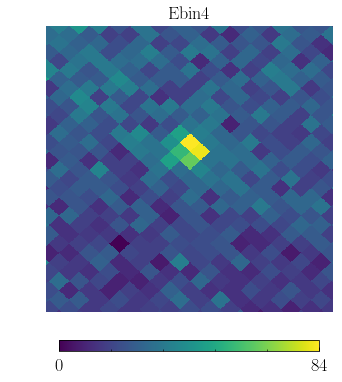

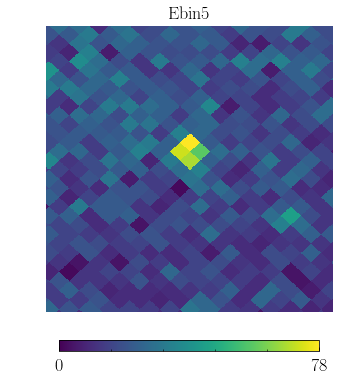

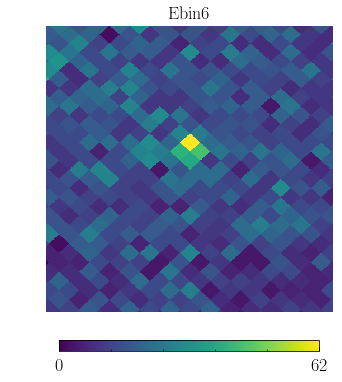

In [37]:
# Get location
l, b = catalog['l'].values[663], catalog['b'].values[663]
print l, b

phi = l*np.pi/180.
theta = np.pi/2 - b*np.pi/180.

print phi, theta

lonval = ((l + 180.) % 360.) - 180.
for ebin in range(4,7):
    data = f_global.CTB_count_maps[ebin]
    hp.cartview(data,lonra=[lonval-5,lonval+5],latra=[b-5,b+5],title='Ebin'+str(ebin),flip='astro',min=0)

307.8845 17.0814
5.37359824086 1.27266965594


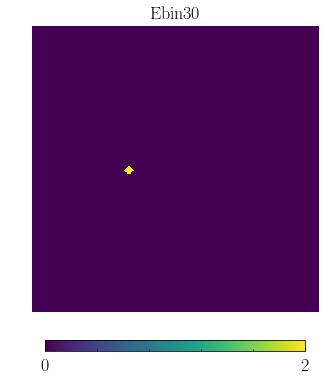

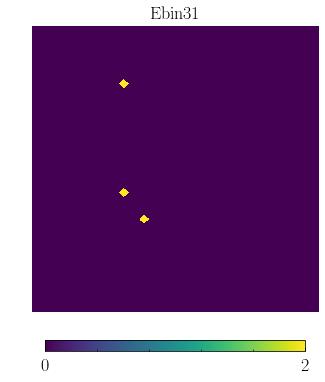

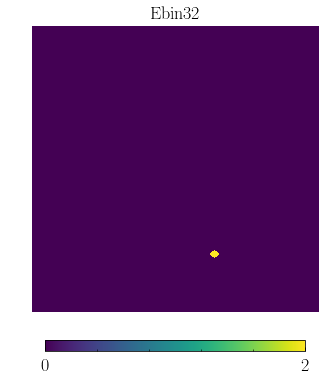

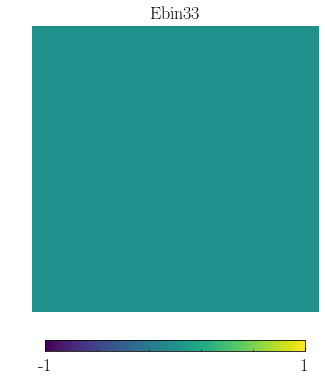

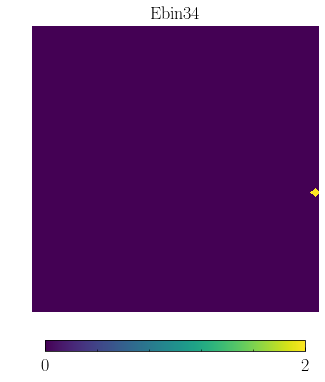

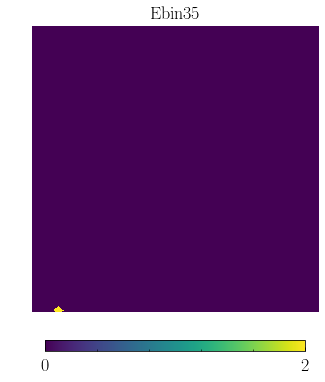

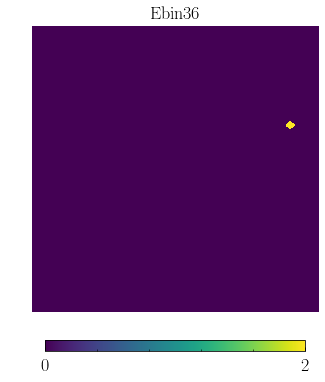

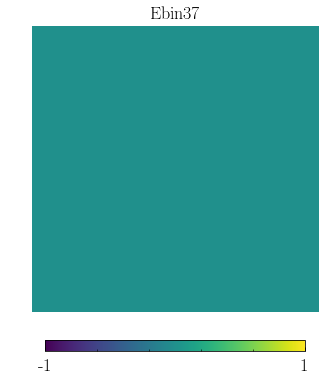

In [8]:
# Get location
l, b = catalog['l'].values[2], catalog['b'].values[2]
print l, b

phi = l*np.pi/180.
theta = np.pi/2 - b*np.pi/180.

print phi, theta

lonval = ((l + 180.) % 360.) - 180.
for ebin in range(30,38):
    data = f_global.CTB_count_maps[ebin]
    hp.cartview(data,lonra=[lonval-10,lonval+10],latra=[b-10,b+10],title='Ebin'+str(ebin),flip='astro',min=0)